In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
'''
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
'''

'\n#--------------------Reading Data from Google Drive------------------------\n\n# Code to read csv file into colaboratory:\n!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n\n# 1. Authenticate and create the PyDrive client.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n'

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/SVM/SalaryData_Train.csv", sep = ',')
data_test = pd.read_csv("/content/drive/My Drive/ER/SVM/SalaryData_Test.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
sns.set_style("whitegrid")

In [0]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [0]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [0]:
data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [0]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [0]:
#Checking if any null data is present in dataset.
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

(array([22653.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

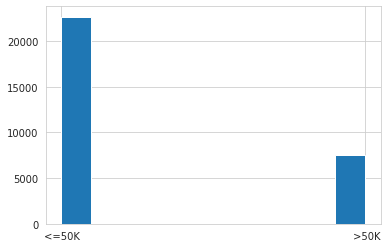

In [0]:
#Checking for unbalance in target variable
plt.hist(data["Salary"])

In [0]:
data["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [0]:
#Replacing the strings in target variable with numbers.
data["Salary"].replace(to_replace = " <=50K", value = 0, inplace = True)
data["Salary"].replace(to_replace = " >50K", value = 1, inplace = True)

In [0]:
#Checking for any spaces in the dataset instead of values.

for i in ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'] :

       data[i] == " "

In [0]:
#Checking the unique values for each categorical variable.
data["native"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [0]:
data["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [0]:
data["educationno"].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

In [0]:
data[data["education"] == " Bachelors"]["educationno"].unique()

array([13])

## Observation


*   As the Education and Educationno are analogous, hence removing Education from dataset.



In [0]:
#Dropping the Education column from dataset
data.drop( labels = ["education"],  axis = 1, inplace = True)

In [0]:
data.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [0]:
#As this is an unbalanced dataset, performing an upsampling for the minority class.

data_minority = data[data["Salary"]==1]
data_majority = data[data["Salary"] == 0]

len(data[data["Salary"]==0])

22653

In [0]:
#Upsampling
resampled_data = resample(data_minority, replace = True, n_samples = 22653, random_state = 42  )
data = pd.concat([data_majority, resampled_data])

In [0]:
#Shuffling the data to get a mix of both the types of class labels.
data = data.sample(frac = 1)

In [0]:
data.shape

(45306, 13)

In [0]:
#Checking the unique values for each categorical variable.

data["workclass"].unique()

array([' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' Local-gov',
       ' Federal-gov', ' State-gov', ' Without-pay'], dtype=object)

In [0]:
data["maritalstatus"].unique()

array([' Never-married', ' Married-civ-spouse', ' Separated', ' Divorced',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [0]:
data["occupation"].unique()

array([' Adm-clerical', ' Machine-op-inspct', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Handlers-cleaners',
       ' Exec-managerial', ' Transport-moving', ' Tech-support',
       ' Other-service', ' Farming-fishing', ' Protective-serv',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [0]:
data["relationship"].unique()

array([' Not-in-family', ' Husband', ' Own-child', ' Other-relative',
       ' Unmarried', ' Wife'], dtype=object)

In [0]:
data["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [0]:
data["native"].unique()

array([' United-States', ' Germany', ' Greece', ' El-Salvador',
       ' Trinadad&Tobago', ' China', ' Mexico', ' Canada', ' South',
       ' Hong', ' Haiti', ' Puerto-Rico', ' Taiwan', ' Philippines',
       ' Japan', ' Outlying-US(Guam-USVI-etc)', ' Dominican-Republic',
       ' Italy', ' Cuba', ' England', ' Laos', ' Vietnam', ' India',
       ' Portugal', ' Columbia', ' Yugoslavia', ' France', ' Poland',
       ' Cambodia', ' Guatemala', ' Iran', ' Peru', ' Jamaica',
       ' Nicaragua', ' Hungary', ' Thailand', ' Scotland', ' Ireland',
       ' Ecuador', ' Honduras'], dtype=object)

In [0]:
data["hoursperweek"].unique()

array([20, 40, 22, 17, 70, 10, 50, 38, 36, 48, 32, 45, 55, 15, 60, 46, 35,
       24, 30, 44, 42,  8, 18, 51, 13, 99, 65, 56, 98, 80, 33, 43, 39, 52,
       54, 25, 14, 37, 49, 75, 28,  7, 12, 72, 11, 84, 62, 16,  9, 47,  5,
        6, 21, 97, 23, 85, 91, 78, 58, 34, 27, 90, 68, 26, 61, 74, 64, 31,
       53,  4,  1, 41, 63, 57, 29, 66, 96, 77,  3, 86, 76,  2, 67, 95, 81,
       19, 94, 87, 73, 59, 89, 82, 88, 92])

In [0]:
data[data["capitalgain"]!= 0]

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
18927,68,Private,14,Never-married,Adm-clerical,Not-in-family,White,Female,6360,0,20,United-States,0
11651,57,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,40,United-States,1
28424,41,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,70,United-States,1
13147,34,Private,9,Never-married,Tech-support,Own-child,Asian-Pac-Islander,Male,14084,0,35,China,1
1145,54,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29436,64,Private,9,Widowed,Sales,Not-in-family,White,Female,8614,0,50,France,1
3133,41,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2885,0,40,United-States,0
6414,69,Private,9,Widowed,Machine-op-inspct,Unmarried,White,Male,2538,0,40,United-States,0
22469,32,Local-gov,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,5013,0,45,United-States,0


In [0]:
#Creating dummy columns for categorical variable.

d1 = pd.get_dummies(data["workclass"])
d2 = pd.get_dummies(data["maritalstatus"])
d3 = pd.get_dummies(data["occupation"])
d4 = pd.get_dummies(data["relationship"])
d5 = pd.get_dummies(data["race"])
d6 = pd.get_dummies(data["native"])
d7 = pd.get_dummies(data["sex"])

In [0]:
dummy_df = pd.concat([d1,d2,d3,d4,d5,d6,d7], axis = 1)

In [0]:
dummy_df.head()

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Cambodia,...,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Female,Male
18927,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9420,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11651,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
21172,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8347,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
data.drop(labels = ["workclass", "maritalstatus", "occupation",
                    "relationship", "race", "native", "sex"],
                    axis = 1, inplace = True)

In [0]:
#Assigning the target variable to y.

y = data["Salary"]
data.drop("Salary", axis = 1, inplace = True)

In [0]:
data.head(10)

,age,educationno,capitalgain,capitalloss,hoursperweek
18927,68,14,6360,0,20
9420,23,9,0,0,40
11651,57,13,7298,0,40
21172,18,7,0,0,40
8347,18,9,0,0,22
24993,17,7,0,0,17
28424,41,13,7688,0,70
26459,43,13,0,1902,40
22343,19,7,0,0,10
1006,44,13,0,0,50


In [0]:
#Final cleaned dataset.
data = pd.concat([data, dummy_df], axis = 1)

In [0]:
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,...,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Female,Male
18927,68,14,6360,0,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9420,23,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11651,57,13,7298,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
21172,18,7,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8347,18,9,0,0,22,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
data.shape

(45306, 86)

In [0]:
#Normalizing data
mms = MinMaxScaler()
scaled_df = mms.fit_transform(data)
data_1 = pd.DataFrame(scaled_df)

In [0]:
data_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85
0,0.698630,0.866667,0.063601,0.0,0.193878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.082192,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.547945,0.800000,0.072981,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.013699,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.013699,0.533333,0.000000,0.0,0.214286,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
#Modelling for SVM
#Train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size = 0.2, random_state = 42, stratify = y)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [0]:
X_train.shape

(36244, 86)

In [0]:
X_test.shape

(9062, 86)

In [0]:
y_train.shape

(36244,)

In [0]:
y_test.shape

(9062,)

In [0]:
print(

SyntaxError: ignored

In [0]:
alpha = [0.0000001, 0.000001, 0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
prediction = []
for i in alpha:
  sgd = SGDClassifier( alpha = i, max_iter = 2000)
  SGD = sgd.fit(X_tr, y_tr)
  cl = CalibratedClassifierCV(base_estimator = SGD)
  cl.fit(X_tr, y_tr)
  pred = cl.predict(X_cv)
  prediction.append(np.mean(pred == y_cv)*100)

  #predict_prob = cl.predict_proba(X_train)
  print("Predict accuracy for ", i," is ", (np.mean(pred == y_cv))*100)


Predict accuracy for  1e-07  is  79.76272589322664
Predict accuracy for  1e-06  is  81.81818181818183
Predict accuracy for  1e-05  is  82.19064698579113
Predict accuracy for  0.0001  is  82.02510691129811
Predict accuracy for  0.001  is  80.36970616636778
Predict accuracy for  0.01  is  77.08649468892261
Predict accuracy for  0.1  is  76.2725893226652
Predict accuracy for  1  is  74.54821354669609
Predict accuracy for  10  is  74.54821354669609
Predict accuracy for  100  is  74.54821354669609
Predict accuracy for  1000  is  74.54821354669609


Text(0.5, 1.0, 'Accuracy vs Log-Alpha')

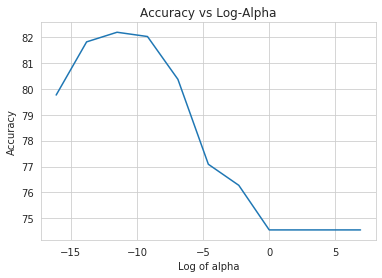

In [62]:
sns.lineplot(np.log(alpha), y = prediction)
plt.xlabel("Log of alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Log-Alpha")

Therefore, it looks like alpha = 0.00001 gives best accuracy.

In [63]:
sgd = SGDClassifier( alpha = 0.00001, max_iter = 2000)
SGD = sgd.fit(X_train, y_train)
cl = CalibratedClassifierCV(base_estimator = SGD)
cl.fit(X_train, y_train)

pred = cl.predict(X_test)
print("Predict accuracy for alpha = 0.00001 is ", (np.mean(pred == y_test))*100)

Predict accuracy for alpha = 0.00001 is  80.79894063120724
